# All Lines Tangent to Four Spheres

Consider all tangent lines to four mutually touching spheres.

The original formulation as polynomial system came from
Cassiano Durand, then at the CS department in Purdue.
The positioning of the centers of the spheres, each with radius
0.5 at the vertices of a tetrahedron came from Thorsten Theobald,
then at TU Muenich.  The centers of the four spheres are
$$
  c_1 = (0, 0, 0), \quad
  c_2 = (1, 0, 0), \quad
  c_3 = (1/2, \sqrt{3}/2, 0), \quad
  c_4 = (1/2, \sqrt{3}/6, \sqrt{6}/3).   
$$
Let $t = (x_0, x_1, x_2)$ be the tangent vector 
and $m = (x_3, x_4, x_5)$ the moment vector.

The first equation is $\|t\|=1$, the second $m \cdot t = 0$,
the other equations are $\|m - c_i \times t \|^2 - r^2 = 0$,
where the radius $r = 1/2$.

In [1]:
from sympy import var, sqrt
from sympy.vector import CoordSys3D, Vector
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from phcpy.solver import solve
from phcpy.solutions import coordinates

PHCv2.4.88 released 2023-12-26 works!


# 0. Centers and Radii

Choices of the centers and radii of four mutually tangent spheres are defined here.

In [3]:
ctr1 = (0, 0, 0)
ctr2 = (1, 0, 0)
ctr3 = (0.5, sqrt(3.0)/2, 0)
ctr4 = (0.5, sqrt(3.0)/6, sqrt(6.0)/3)
radius = 0.5
centers = [ctr1, ctr2, ctr3, ctr4]
centers

[(0, 0, 0),
 (1, 0, 0),
 (0.5, 0.866025403784439, 0),
 (0.5, 0.288675134594813, 0.816496580927726)]

In [4]:
#ctr1 = (1, 1, 1)
#ctr2 = (1, -1, -1)
#ctr3 = (-1, 1, -1)
#ctr4 = (-1, -1, 1)
#radius = sqrt(2.0)
#centers = [ctr1, ctr2, ctr3, ctr4]
#centers

The choices below can be found in the paper by Frank Sottile and Thorsten Theobald:
**Line problems in nonlinear computational geometry**.
In *Computational Geometry - Twenty Years Later*, pages 411-432,
edited by J.E. Goodman, J. Pach, and R. Pollack, AMS, 2008.

In [5]:
#ctr1 = (2, 2, 0)
#ctr2 = (2, 0, 2)
#ctr3 = (0, 2, 2)
#ctr4 = (0, 0, 0)
#radius = 3/2
#centers = [ctr1, ctr2, ctr3, ctr4]
#centers

## 1. Formulating the Equations

In [6]:
N = CoordSys3D('N')

In [7]:
x0, x1, x2 = var('x0, x1, x2')
vt = Vector.zero + x0*N.i + x1*N.j + x2*N.k
normt = vt.dot(vt) - 1
normt

x0**2 + x1**2 + x2**2 - 1

In [8]:
x3, x4, x5 = var('x3, x4, x5')
vm = Vector.zero + x3*N.i + x4*N.j + x5*N.k
momvt = vt.dot(vm)
momvt

x0*x3 + x1*x4 + x2*x5

In [9]:
radii = [radius for _ in range(4)]
radii

[0.5, 0.5, 0.5, 0.5]

In [10]:
eqs = [normt, momvt]
for (ctr, rad) in zip(centers, radii):
    vc = Vector.zero + ctr[0]*N.i + ctr[1]*N.j + ctr[2]*N.k
    left = vm - vc.cross(vt)
    equ = left.dot(left) - rad**2
    eqs.append(equ)

To apply the blackbox solver, we have to convert the polynomials to strings.

In [11]:
fourspheres = []
print('the polynomial system :')
for pol in eqs:
    print(pol)
    fourspheres.append(str(pol) + ';')

the polynomial system :
x0**2 + x1**2 + x2**2 - 1
x0*x3 + x1*x4 + x2*x5
x3**2 + x4**2 + x5**2 - 0.25
x3**2 + (-x1 + x5)**2 + (x2 + x4)**2 - 0.25
(-0.866025403784439*x2 + x3)**2 + (0.5*x2 + x4)**2 + (0.866025403784439*x0 - 0.5*x1 + x5)**2 - 0.25
(-0.816496580927726*x0 + 0.5*x2 + x4)**2 + (0.288675134594813*x0 - 0.5*x1 + x5)**2 + (0.816496580927726*x1 - 0.288675134594813*x2 + x3)**2 - 0.25


## 2. Solving the Problem

Now we call the blackbox solver.

In [12]:
sols = solve(fourspheres)

In [13]:
print('the solutions :')
for (idx, sol) in enumerate(sols):
    print('Solution', idx+1, ':')
    print(sol)

the solutions :
Solution 1 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 4
the solution for t :
 x0 : -7.07106781186548E-01  -3.29897880138575E-17
 x1 : -4.08248290463863E-01   1.39782695266189E-16
 x2 :  5.77350269189625E-01   5.84372180366679E-17
 x3 :  2.50000000000000E-01  -1.09454450599415E-29
 x4 : -4.33012701892219E-01   1.33021670142893E-28
 x5 :  4.65788160781317E-17   1.19122018692375E-16
== err :  4.172E-14 = rco :  3.522E-17 = res :  3.608E-16 =
Solution 2 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 4
the solution for t :
 x0 :  7.07106781186547E-01  -8.97770343390015E-17
 x1 : -4.08248290463863E-01  -2.59365987720240E-18
 x2 :  5.77350269189626E-01   1.08119967888178E-16
 x3 :  2.50000000000000E-01   2.77333911991762E-31
 x4 : -1.44337567297407E-01  -1.08119967888178E-16
 x5 : -4.08248290463863E-01   3.82261812377014E-17
== err :  1.128E-15 = rco :  4.744E-17 = res :  4.163E-16 =
Solution 3 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 4
the so

Observe the `m : 4`, indicating the each solution has multiplicity four.

# 3. The Tangent Lines

The solutions contain the components of the tangent and moment vectors, from which the tangent lines can be computed.

In [14]:
def tangent_lines(solpts, verbose=True):
    """
    Given in solpts is the list of solution points,
    the tuples which respresent the tangent lines
    are returned in a list.
    Each tuple contains a point on the line
    and the tangent vector.
    """
    result = []
    for point in solpts:
        if verbose:
            print(point, end='')
        tan = Vector.zero + point[0]*N.i + point[1]*N.j + point[2]*N.k
        mom = Vector.zero + point[3]*N.i + point[4]*N.j + point[5]*N.k
        pnt = tan.cross(mom) # solves m = p x t
        pntcrd = (pnt.dot(N.i), pnt.dot(N.j), pnt.dot(N.k))
        tancrd = (tan.dot(N.i), tan.dot(N.j), tan.dot(N.k))
        if verbose:
            print(', appending :', pntcrd)
        result.append((pntcrd, tancrd))
    return result

In [15]:
print(sols[0])

t :  1.00000000000000E+00   0.00000000000000E+00
m : 4
the solution for t :
 x0 : -7.07106781186548E-01  -3.29897880138575E-17
 x1 : -4.08248290463863E-01   1.39782695266189E-16
 x2 :  5.77350269189625E-01   5.84372180366679E-17
 x3 :  2.50000000000000E-01  -1.09454450599415E-29
 x4 : -4.33012701892219E-01   1.33021670142893E-28
 x5 :  4.65788160781317E-17   1.19122018692375E-16
== err :  4.172E-14 = rco :  3.522E-17 = res :  3.608E-16 =


In [16]:
crd = [coordinates(sol) for sol in sols]
complexpoints = [values for (names, values) in crd]
points = []
for point in complexpoints:
    vals = []
    for values in point:
        vals.append(values.real)
    points.append(tuple(vals))
points[0]

(-0.707106781186548,
 -0.408248290463863,
 0.577350269189625,
 0.25,
 -0.433012701892219,
 4.65788160781317e-17)

In [17]:
tangents = tangent_lines(points)

(-0.707106781186548, -0.408248290463863, 0.577350269189625, 0.25, -0.433012701892219, 4.65788160781317e-17), appending : (0.249999999999999, 0.144337567297406, 0.408248290463863)
(0.707106781186547, -0.408248290463863, 0.577350269189626, 0.25, -0.144337567297407, -0.408248290463863), appending : (0.250000000000000, 0.433012701892219, -3.19189119579733e-16)
(1.7461033265236e-16, -0.816496580927726, -0.577350269189625, 1.14075390551166e-16, 0.288675134594813, -0.408248290463863), appending : (0.500000000000000, 5.42291236002512e-18, 1.43547827633087e-16)
(-3.91247307335336e-16, 0.816496580927726, 0.577350269189625, -9.96691975932299e-17, -0.288675134594813, 0.408248290463863), appending : (0.500000000000000, 1.02182006307875e-16, 1.94322928163568e-16)
(-0.707106781186548, 0.408248290463863, -0.577350269189626, -0.25, 0.144337567297406, 0.408248290463863), appending : (0.250000000000000, 0.433012701892220, 2.49800180540660e-16)
(0.707106781186547, 0.408248290463863, -0.577350269189626, -0

In [18]:
tangents[0]

((0.249999999999999, 0.144337567297406, 0.408248290463863),
 (-0.707106781186548, -0.408248290463863, 0.577350269189625))

## 4. Plotting the Lines

Let us first plot the four spheres...

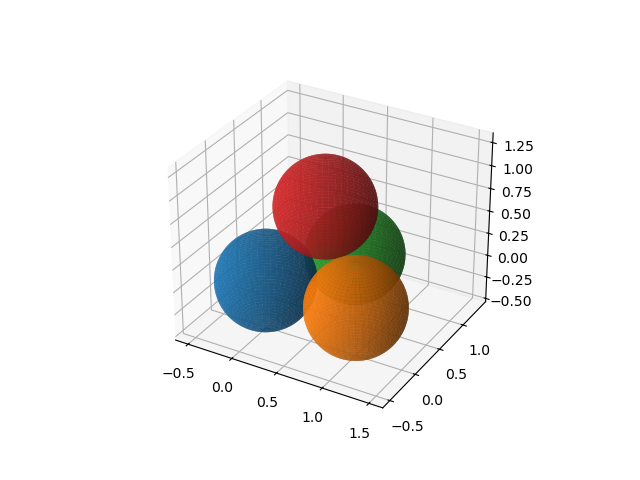

In [19]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
R = float(radius)
x1 = float(ctr1[0]) + R * np.outer(np.cos(u), np.sin(v))
y1 = float(ctr1[1]) + R * np.outer(np.sin(u), np.sin(v))
z1 = float(ctr1[2]) + R * np.outer(np.ones(np.size(u)), np.cos(v))
x2 = float(ctr2[0]) + R * np.outer(np.cos(u), np.sin(v))
y2 = float(ctr2[1]) + R * np.outer(np.sin(u), np.sin(v))
z2 = float(ctr2[2]) + R * np.outer(np.ones(np.size(u)), np.cos(v))
x3 = float(ctr3[0]) + R * np.outer(np.cos(u), np.sin(v))
y3 = float(ctr3[1]) + R * np.outer(np.sin(u), np.sin(v))
z3 = float(ctr3[2]) + R * np.outer(np.ones(np.size(u)), np.cos(v))
x4 = float(ctr4[0]) + R * np.outer(np.cos(u), np.sin(v))
y4 = float(ctr4[1]) + R * np.outer(np.sin(u), np.sin(v))
z4 = float(ctr4[2]) + R * np.outer(np.ones(np.size(u)), np.cos(v))
# Plot the surfaces
sphere1 = ax.plot_surface(x1, y1, z1, alpha=0.8)
sphere2 = ax.plot_surface(x2, y2, z2, alpha=0.8)
sphere3 = ax.plot_surface(x3, y3, z3, alpha=0.8)
sphere3 = ax.plot_surface(x4, y4, z4, alpha=0.8)
# Set an equal aspect ratio
ax.set_aspect('equal')
plt.show()
plt.savefig('fourspheresfig1')

The second figure are the tangent lines.

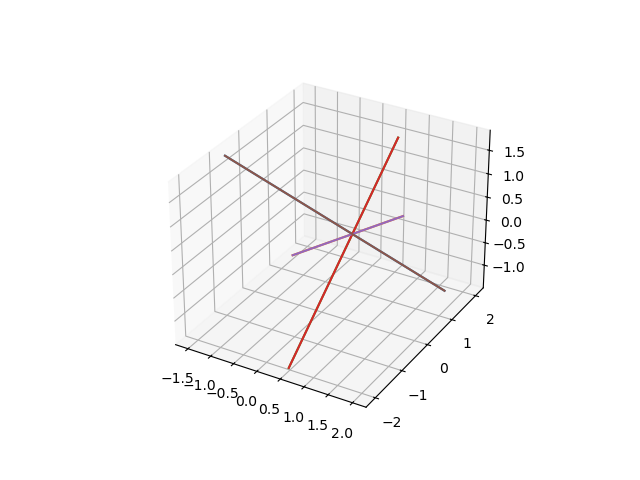

In [20]:
%matplotlib widget
ax = plt.figure().add_subplot(projection='3d')
# range of the tangent lines
theta = np.linspace(-2.5, 2.5, 10)
pnt1, tan1 = tangents[0]
x1 = float(pnt1[0]) + theta*tan1[0]
y1 = float(pnt1[1]) + theta*tan1[1]
z1 = float(pnt1[2]) + theta*tan1[2]
pnt2, tan2 = tangents[1]
x2 = float(pnt2[0]) + theta*tan2[0]
y2 = float(pnt2[1]) + theta*tan2[1]
z2 = float(pnt2[2]) + theta*tan2[2]
pnt3, tan3 = tangents[2]
x3 = float(pnt3[0]) + theta*tan3[0]
y3 = float(pnt3[1]) + theta*tan3[1]
z3 = float(pnt3[2]) + theta*tan3[2]
pnt4, tan4 = tangents[3]
x4 = float(pnt4[0]) + theta*tan4[0]
y4 = float(pnt4[1]) + theta*tan4[1]
z4 = float(pnt4[2]) + theta*tan4[2]
pnt5, tan5 = tangents[4]
x5 = float(pnt5[0]) + theta*tan5[0]
y5 = float(pnt5[1]) + theta*tan5[1]
z5 = float(pnt5[2]) + theta*tan5[2]
pnt6, tan6 = tangents[5]
x6 = float(pnt6[0]) + theta*tan6[0]
y6 = float(pnt6[1]) + theta*tan6[1]
z6 = float(pnt6[2]) + theta*tan6[2]
line1 = ax.plot(x1, y1, z1)
line2 = ax.plot(x2, y2, z2)
line3 = ax.plot(x3, y3, z3)
line4 = ax.plot(x4, y4, z4)
line5 = ax.plot(x5, y5, z5)
line6 = ax.plot(x6, y6, z6)
# Set an equal aspect ratio
ax.set_aspect('equal')
plt.show()
plt.savefig('fourspheresfig2')

And then we plot the spheres and the tangent lines:

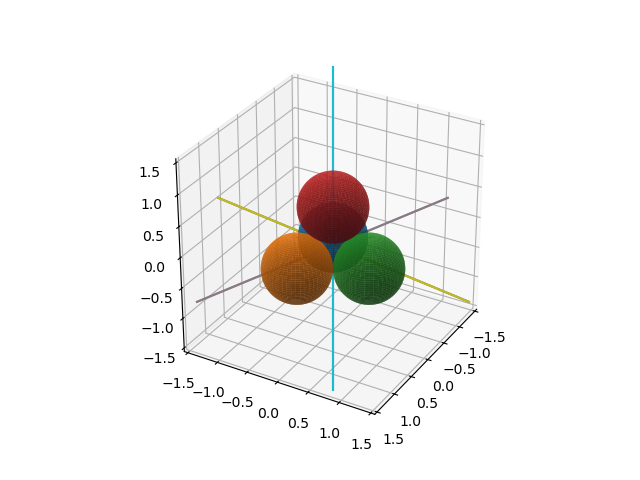

In [21]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
R = float(radius)
x1 = float(ctr1[0]) + R * np.outer(np.cos(u), np.sin(v))
y1 = float(ctr1[1]) + R * np.outer(np.sin(u), np.sin(v))
z1 = float(ctr1[2]) + R * np.outer(np.ones(np.size(u)), np.cos(v))
x2 = float(ctr2[0]) + R * np.outer(np.cos(u), np.sin(v))
y2 = float(ctr2[1]) + R * np.outer(np.sin(u), np.sin(v))
z2 = float(ctr2[2]) + R * np.outer(np.ones(np.size(u)), np.cos(v))
x3 = float(ctr3[0]) + R * np.outer(np.cos(u), np.sin(v))
y3 = float(ctr3[1]) + R * np.outer(np.sin(u), np.sin(v))
z3 = float(ctr3[2]) + R * np.outer(np.ones(np.size(u)), np.cos(v))
x4 = float(ctr4[0]) + R * np.outer(np.cos(u), np.sin(v))
y4 = float(ctr4[1]) + R * np.outer(np.sin(u), np.sin(v))
z4 = float(ctr4[2]) + R * np.outer(np.ones(np.size(u)), np.cos(v))
# Plot the surfaces
sphere1 = ax.plot_surface(x1, y1, z1, alpha=0.8)
sphere2 = ax.plot_surface(x2, y2, z2, alpha=0.8)
sphere3 = ax.plot_surface(x3, y3, z3, alpha=0.8)
sphere4 = ax.plot_surface(x4, y4, z4, alpha=0.8)
# range of the tangent lines
theta = np.linspace(-2.5, 2.5, 10)
pnt1, tan1 = tangents[0]
x1 = float(pnt1[0]) + theta*tan1[0]
y1 = float(pnt1[1]) + theta*tan1[1]
z1 = float(pnt1[2]) + theta*tan1[2]
pnt2, tan2 = tangents[1]
x2 = float(pnt2[0]) + theta*tan2[0]
y2 = float(pnt2[1]) + theta*tan2[1]
z2 = float(pnt2[2]) + theta*tan2[2]
pnt3, tan3 = tangents[2]
x3 = float(pnt3[0]) + theta*tan3[0]
y3 = float(pnt3[1]) + theta*tan3[1]
z3 = float(pnt3[2]) + theta*tan3[2]
pnt4, tan4 = tangents[3]
x4 = float(pnt4[0]) + theta*tan4[0]
y4 = float(pnt4[1]) + theta*tan4[1]
z4 = float(pnt4[2]) + theta*tan4[2]
pnt5, tan5 = tangents[4]
x5 = float(pnt5[0]) + theta*tan5[0]
y5 = float(pnt5[1]) + theta*tan5[1]
z5 = float(pnt5[2]) + theta*tan5[2]
pnt6, tan6 = tangents[5]
x6 = float(pnt6[0]) + theta*tan6[0]
y6 = float(pnt6[1]) + theta*tan6[1]
z6 = float(pnt6[2]) + theta*tan6[2]
line1 = ax.plot(x1, y1, z1)
line2 = ax.plot(x2, y2, z2)
line3 = ax.plot(x3, y3, z3)
line4 = ax.plot(x4, y4, z4)
line5 = ax.plot(x5, y5, z5)
line6 = ax.plot(x6, y6, z6)
# Set an equal aspect ratio
ax.axes.set_xlim3d(-1.5, 1.5)
ax.axes.set_ylim3d(-1.5, 1.5) 
ax.axes.set_zlim3d(-1.5, 1.5) 
ax.set_aspect('equal')
ax.view_init(elev=30, azim=30, roll=0)
plt.show()
plt.savefig('fourspheresfig3')